# Pandas, Matplotlib and Seaborn

In [2]:
import pandas as pd

[Dataset Soruce](https://www.kaggle.com/datasets/rajkumarpandey02/gdp-in-usd-per-capita-income-by-country)

CONTENT
<p>The figures presented here do not take into account differences in the cost of living in different countries, and the results vary greatly from one year to another based on fluctuations in the exchange rates of the country's currency. Such fluctuations change a country's ranking from one year to the next, even though they often make little or no difference to the standard of living of its population.

GDP per capita is often considered an indicator of a country's standard of living; however, this is inaccurate because GDP per capita is not a measure of personal income.

Comparisons of national income are also frequently made on the basis of purchasing power parity (PPP), to adjust for differences in the cost of living in different countries. (See List of countries by GDP (PPP) per capita.) PPP largely removes the exchange rate problem but not others; it does not reflect the value of economic output in international trade, and it also requires more estimation than GDP per capita. On the whole, PPP per capita figures are more narrowly spread than nominal GDP per capita figures.</p>

Here are some resources to learn about GDP: 
#### [World Bank](https://data.worldbank.org/indicator/ny.gdp.pcap.cd?most_recent_value_desc=false)
#### [Our World in Data](https://ourworldindata.org/grapher/gdp-per-capita-worldbank)
#### [IMF](https://www.imf.org/external/datamapper/NGDPD@WEO/OEMDC/ADVEC/WEOWORLD)
#### [UN Data](https://data.un.org/Data.aspx?d=SNAAMA&f=grID%3A101%3BcurrID%3AUSD%3BpcFlag%3A1)



In [ ]:
df = pd.read_csv("GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

In [3]:
df = pd.read_csv(r"D:\桌面\bootcamp\week 6\Day 4 Resources\GDP (nominal) per Capita.csv",encoding= 'unicode_escape',  index_col=0)

## EDA (Exploratory Data Analysis)

### Use this section to explore and inspect dataset.

In [ ]:
# number of countries per region

In [4]:
df.head(5)

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
1,Monaco,Europe,0,0,234316,2021,234317,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021
5,Bermuda,Americas,0,0,114090,2021,112653,2021


In [5]:
df.groupby("UN_Region")["Country/Territory"].size()

UN_Region
Africa      55
Americas    48
Asia        51
Europe      48
Oceania     20
World        1
Name: Country/Territory, dtype: int64

In [6]:
df.groupby("UN_Region")["Country/Territory"].count()

UN_Region
Africa      55
Americas    48
Asia        51
Europe      48
Oceania     20
World        1
Name: Country/Territory, dtype: int64

In [7]:
# number of countries per region

#df.groupby("UN_Region")["Country/Territory"].count()
#df.groupby("UN_Region")["Country/Territory"].size()
pd.pivot_table(df, index='UN_Region', values='Country/Territory',aggfunc='count')

,Country/Territory
UN_Region,
Africa,55
Americas,48
Asia,51
Europe,48
Oceania,20
World,1


In [8]:
df.isnull().sum()

Country/Territory     0
UN_Region             0
IMF_Estimate          0
IMF_Year              0
WorldBank_Estimate    0
WorldBank_Year        0
UN_Estimate           0
UN_Year               0
dtype: int64

In [9]:
print("IMF_Year:",sorted(df["IMF_Year"].unique()))
print("WorldBank_Year:",sorted(df["WorldBank_Year"].unique()))
print("UN_Year:",sorted(df["UN_Year"].unique()))

IMF_Year: [0, 2020, 2022, 2023]
WorldBank_Year: [0, 2007, 2011, 2014, 2015, 2018, 2019, 2020, 2021]
UN_Year: ['0', '2021', '[n 10]2021']


In [10]:
df_1 = df[df["UN_Year"] == '[n 10]2021']
df_1

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
194,Tanzania,Africa,1348,2023,1099,2021,1136,[n 10]2021


In [11]:
import re

df['UN_Year_Clean'] = df['UN_Year'].apply(
    lambda x: re.search(r'\d{4}', x).group(0) if isinstance(x, str) and '[n 10]' in x else x
)
df["UN_Year_Clean"].unique()

array(['2021', '0'], dtype=object)

In [33]:
#print("IMF_Estimate:\n",sorted(df["IMF_Estimate"].unique()))
#print("WorldBank_Estimate:\n",sorted(df["WorldBank_Estimate"].unique()))
#print("UN_Estimate:\n",sorted(df["UN_Estimate"].unique()))

In [12]:
#What is European Union[n 1]?

df[df["Country/Territory"] == "European Union[n 1]"]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
36,European Union[n 1],Europe,39940,2023,38411,2021,31875,2021,2021


In [ ]:
# Countries in Europe below avarege

In [14]:
df_Europe = df[df["UN_Region"] == "Europe"]
df_Europe

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,0,0,234316,2021,234317,2021,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021,2021
3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021,2021
4,Ireland,Europe,114581,2023,100172,2021,101109,2021,2021
6,Norway,Europe,101103,2023,89154,2021,89242,2021,2021
7,Switzerland,Europe,98767,2023,91992,2021,93525,2021,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0,0
13,Iceland,Europe,75180,2023,68728,2021,69133,2021,2021
14,Channel Islands,Europe,0,0,75153,2007,0,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0,0


In [39]:
#df.groupby("UN_Region")["IMF_Estimate"].mean()
pd.pivot_table(df, index='UN_Region',columns = 'IMF_Year',values='IMF_Estimate',aggfunc='mean')

IMF_Year,0,2020,2022,2023
UN_Region,,,,
Africa,0.0,NaN,NaN,2854.240741
Americas,0.0,NaN,NaN,15828.055556
Asia,0.0,2100.0,2510.0,18682.400000
Europe,0.0,NaN,NaN,38452.186047
Oceania,0.0,NaN,NaN,13047.357143
World,NaN,NaN,NaN,13440.000000


In [26]:
# Countries in Europe below avarege

#Based on IMF Statistics
df_Europe_below_imfavg = df_Europe[df_Europe["IMF_Estimate"] < df_Europe["IMF_Estimate"].mean()]
df_Europe_below_imfavg["IMF_Estimate_Mean"] = df_Europe["IMF_Estimate"].mean()
print(df_Europe_below_imfavg[['Country/Territory','UN_Region','IMF_Estimate','IMF_Estimate_Mean']],"\n")

#Based on WorldBank Statistics
df_Europe_below_wbavg = df_Europe[df_Europe["WorldBank_Estimate"] < df_Europe["WorldBank_Estimate"].mean()]
df_Europe_below_wbavg["WorldBank_Estimate_Mean"] = df_Europe["WorldBank_Estimate"].mean()
print(df_Europe_below_wbavg[['Country/Territory','UN_Region','WorldBank_Estimate','WorldBank_Estimate_Mean']],"\n")

#Based on UN Statistics
df_Europe_below_unavg = df_Europe[df_Europe["UN_Estimate"] < df_Europe["UN_Estimate"].mean()]
df_Europe_below_unavg["UN_Estimate_Mean"] = df_Europe["UN_Estimate"].mean()
print(df_Europe_below_unavg[['Country/Territory','UN_Region','UN_Estimate','UN_Estimate_Mean']])


          Country/Territory UN_Region  IMF_Estimate  IMF_Estimate_Mean
1                    Monaco    Europe             0           34446.75
2             Liechtenstein    Europe             0           34446.75
9               Isle of Man    Europe             0           34446.75
14          Channel Islands    Europe             0           34446.75
15            Faroe Islands    Europe             0           34446.75
51                 Slovenia    Europe         32214           34446.75
52           Czech Republic    Europe         31368           34446.75
53                    Spain    Europe         31223           34446.75
54                  Estonia    Europe         31209           34446.75
57                Lithuania    Europe         28094           34446.75
59                 Portugal    Europe         26012           34446.75
60                   Latvia    Europe         25136           34446.75
62                 Slovakia    Europe         23457           34446.75
63    

C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2144564017.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Europe_below_imfavg["IMF_Estimate_Mean"] = df_Europe["IMF_Estimate"].mean()
C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2144564017.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Europe_below_wbavg["WorldBank_Estimate_Mean"] = df_Europe["WorldBank_Estimate"].mean()
C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2144564017.py:15: SettingWithCopyWarning: 
A value is trying to be set o

In [45]:
## Which countries in Europe has higher GDP than UK?
df_uk = df_Europe[df_Europe["Country/Territory"] == 'United Kingdom']
#Based on IMF Statistics
uk_imf = df_uk['IMF_Estimate'].values[0]
df_country_aboveuk_imf = df_Europe[df_Europe["IMF_Estimate"]>uk_imf]
df_country_aboveuk_imf["UK_IMF_Estimate"] = uk_imf
print("Based on IMF Statistics,countries in Europe has higher GDP than UK are shown as follow:")
print(df_country_aboveuk_imf[['Country/Territory','UN_Region','IMF_Estimate','UK_IMF_Estimate']],"\n")
print("------------------------")

#Based on WorldBank Statistics
uk_wb = df_uk['WorldBank_Estimate'].values[0]
df_country_aboveuk_wb = df_Europe[df_Europe["WorldBank_Estimate"]>uk_wb]
df_country_aboveuk_wb["UK_WorldBank_Estimate"] = uk_wb
print("Based on WorldBank Statistics,countries in Europe has higher GDP than UK are shown as follow:")
print(df_country_aboveuk_wb[['Country/Territory','UN_Region','WorldBank_Estimate','UK_WorldBank_Estimate']],"\n")
print("------------------------")

#Based on UN Statistics
uk_un = df_uk['UN_Estimate'].values[0]
df_country_aboveuk_un = df_Europe[df_Europe["UN_Estimate"]>uk_un]
df_country_aboveuk_un["UK_UN_Estimate"] = uk_un
print("Based on UN Statistics,countries in Europe has higher GDP than UK are shown as follow:")
print(df_country_aboveuk_un[['Country/Territory','UN_Region','UN_Estimate','UK_UN_Estimate']],"\n")
print("------------------------")

Based on IMF Statistics,countries in Europe has higher GDP than UK are shown as follow:
   Country/Territory UN_Region  IMF_Estimate  UK_IMF_Estimate
3         Luxembourg    Europe        132372            46371
4            Ireland    Europe        114581            46371
6             Norway    Europe        101103            46371
7        Switzerland    Europe         98767            46371
13           Iceland    Europe         75180            46371
16           Denmark    Europe         68827            46371
18       Netherlands    Europe         61098            46371
20           Austria    Europe         56802            46371
22            Sweden    Europe         55395            46371
23           Finland    Europe         54351            46371
24           Belgium    Europe         53377            46371
25        San Marino    Europe         52949            46371
28           Germany    Europe         51383            46371 

------------------------
Based on WorldBan

C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2423601220.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_aboveuk_imf["UK_IMF_Estimate"] = uk_imf
C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2423601220.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country_aboveuk_wb["UK_WorldBank_Estimate"] = uk_wb
C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2423601220.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [20]:
df_Europe_IMF0  = df_Europe[df_Europe['IMF_Year'] == 0]
df_Europe_IMF0              
#["IMF_Estimate"] < df_Europe.groupby('IMF_Year')["IMF_Estimate"].mean()]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,0,0,234316,2021,234317,2021,2021
2,Liechtenstein,Europe,0,0,157755,2020,169260,2021,2021
9,Isle of Man,Europe,0,0,87158,2019,0,0,0
14,Channel Islands,Europe,0,0,75153,2007,0,0,0
15,Faroe Islands,Europe,0,0,69010,2021,0,0,0


## groupby()

[Learn more about groupby](https://www.geeksforgeeks.org/pandas-groupby/)

## Which countries below average by IMF world estimate?

In [48]:
df_countries_below_imf = df[df['IMF_Estimate']<df['IMF_Estimate'].mean()]
df_countries_below_imf["IMF_world_avg_Estimate"] = df['IMF_Estimate'].mean()
df_countries_below_imf[['Country/Territory','IMF_Estimate','IMF_world_avg_Estimate']]

C:\Users\cxy\AppData\Local\Temp\ipykernel_35076\2372232952.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_countries_below_imf["IMF_world_avg_Estimate"] = df['IMF_Estimate'].mean()


,Country/Territory,IMF_Estimate,IMF_world_avg_Estimate
1,Monaco,0,15351.632287
2,Liechtenstein,0,15351.632287
5,Bermuda,0,15351.632287
9,Isle of Man,0,15351.632287
10,Cayman Islands,0,15351.632287
...,...,...,...
219,Malawi,496,15351.632287
220,South Sudan,467,15351.632287
221,Sierra Leone,415,15351.632287
222,Afghanistan,611,15351.632287


### IMF estimate 0 values

In [50]:
df_imf_0 = df[(df['IMF_Estimate'] == 0) | (df['IMF_Year'] == 0)]
df_imf_0[['Country/Territory','UN_Region','IMF_Estimate','IMF_Year']]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year
1,Monaco,Europe,0,0
2,Liechtenstein,Europe,0,0
5,Bermuda,Americas,0,0
9,Isle of Man,Europe,0,0
10,Cayman Islands,Americas,0,0
14,Channel Islands,Europe,0,0
15,Faroe Islands,Europe,0,0
19,Greenland,Americas,0,0
31,British Virgin Islands,Americas,0,0
37,US Virgin Islands,Americas,0,0


## Which country has highest UN Estimate?

In [52]:
highest_un = df.loc[df['UN_Estimate'].idxmax()]

# Display the country and the estimate
print("Country with highest UN Estimate:", highest_un['Country/Territory'])
print("UN Estimate value:", highest_un['UN_Estimate'])

Country with highest UN Estimate: Monaco
UN Estimate value: 234317


## Which country has highest Worlbank Estimate?

In [53]:
highest_un = df.loc[df['WorldBank_Estimate'].idxmax()]

# Display the country and the estimate
print("Country with highest WorldBank Estimate:", highest_un['Country/Territory'])
print("WorldBank Estimate value:", highest_un['WorldBank_Estimate'])

Country with highest WorldBank Estimate: Monaco
WorldBank Estimate value: 234316


## Which country has highest IMF Estimate?

In [54]:
highest_un = df.loc[df['IMF_Estimate'].idxmax()]

# Display the country and the estimate
print("Country with highest IMF Estimate:", highest_un['Country/Territory'])
print("IMF Estimate value:", highest_un['IMF_Estimate'])

Country with highest IMF Estimate: Luxembourg
IMF Estimate value: 132372


## Filling 0 Values by average

In [ ]:
import numpy as np

In [56]:
# replace 0 with null values

import numpy as np

df.replace(0, np.nan, inplace=True)
df

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,NaN,NaN,234316.0,2021.0,234317.0,2021,2021
2,Liechtenstein,Europe,NaN,NaN,157755.0,2020.0,169260.0,2021,2021
3,Luxembourg,Europe,132372.0,2023.0,133590.0,2021.0,133745.0,2021,2021
4,Ireland,Europe,114581.0,2023.0,100172.0,2021.0,101109.0,2021,2021
5,Bermuda,Americas,NaN,NaN,114090.0,2021.0,112653.0,2021,2021
...,...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.0,2023.0,635.0,2021.0,613.0,2021,2021
220,South Sudan,Africa,467.0,2023.0,1072.0,2015.0,400.0,2021,2021
221,Sierra Leone,Africa,415.0,2023.0,480.0,2021.0,505.0,2021,2021
222,Afghanistan,Asia,611.0,2020.0,369.0,2021.0,373.0,2021,2021


In [70]:
# Calculate the average of 'Worldbank_Estimate' and 'UN_Estimate' columns
avg_Worldbank_Estimate = df['WorldBank_Estimate'].mean()
print("The average of 'WorldBank_Estimate' column is:",avg_Worldbank_Estimate)
avg_UN_Estimate = df['UN_Estimate'].mean()
print("The average of 'UN_Estimate' column is:",avg_UN_Estimate)


df['avg_worldbank_un'] = df[['WorldBank_Estimate', 'UN_Estimate']].mean(axis=1)
df

The average of 'WorldBank_Estimate' column is: 19540.805555555555
The average of 'UN_Estimate' column is: 18514.528037383177


,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean,avg_worldbank_un
1,Monaco,Europe,17377.736041,2022,234316.0,2021.0,234317.0,2021,2021,234316.5
2,Liechtenstein,Europe,17377.736041,2022,157755.0,2020.0,169260.0,2021,2021,163507.5
3,Luxembourg,Europe,132372.000000,2023,133590.0,2021.0,133745.0,2021,2021,133667.5
4,Ireland,Europe,114581.000000,2023,100172.0,2021.0,101109.0,2021,2021,100640.5
5,Bermuda,Americas,17377.736041,2022,114090.0,2021.0,112653.0,2021,2021,113371.5
...,...,...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.000000,2023,635.0,2021.0,613.0,2021,2021,624.0
220,South Sudan,Africa,467.000000,2023,1072.0,2015.0,400.0,2021,2021,736.0
221,Sierra Leone,Africa,415.000000,2023,480.0,2021.0,505.0,2021,2021,492.5
222,Afghanistan,Asia,611.000000,2020,369.0,2021.0,373.0,2021,2021,371.0


In [72]:
# Fill the null values in 'imf' column with the calculated average
df['IMF_Estimate'] = df['IMF_Estimate'].fillna(df['IMF_Estimate'].mean())
#imf_mean_year = round(df['IMF_Year'].mean())
df['IMF_Year'] = df['IMF_Year'].fillna(imf_mean_year).astype(int).astype(str)
df

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean,avg_worldbank_un
1,Monaco,Europe,17377.736041,2022,234316.0,2021.0,234317.0,2021,2021,234316.5
2,Liechtenstein,Europe,17377.736041,2022,157755.0,2020.0,169260.0,2021,2021,163507.5
3,Luxembourg,Europe,132372.000000,2023,133590.0,2021.0,133745.0,2021,2021,133667.5
4,Ireland,Europe,114581.000000,2023,100172.0,2021.0,101109.0,2021,2021,100640.5
5,Bermuda,Americas,17377.736041,2022,114090.0,2021.0,112653.0,2021,2021,113371.5
...,...,...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.000000,2023,635.0,2021.0,613.0,2021,2021,624.0
220,South Sudan,Africa,467.000000,2023,1072.0,2015.0,400.0,2021,2021,736.0
221,Sierra Leone,Africa,415.000000,2023,480.0,2021.0,505.0,2021,2021,492.5
222,Afghanistan,Asia,611.000000,2020,369.0,2021.0,373.0,2021,2021,371.0


In [73]:
# Drop the temporary 'avg_worldbank_un' column if not needed
df.drop(columns=['avg_worldbank_un'], inplace=True)
df

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,17377.736041,2022,234316.0,2021.0,234317.0,2021,2021
2,Liechtenstein,Europe,17377.736041,2022,157755.0,2020.0,169260.0,2021,2021
3,Luxembourg,Europe,132372.000000,2023,133590.0,2021.0,133745.0,2021,2021
4,Ireland,Europe,114581.000000,2023,100172.0,2021.0,101109.0,2021,2021
5,Bermuda,Americas,17377.736041,2022,114090.0,2021.0,112653.0,2021,2021
...,...,...,...,...,...,...,...,...,...
219,Malawi,Africa,496.000000,2023,635.0,2021.0,613.0,2021,2021
220,South Sudan,Africa,467.000000,2023,1072.0,2015.0,400.0,2021,2021
221,Sierra Leone,Africa,415.000000,2023,480.0,2021.0,505.0,2021,2021
222,Afghanistan,Asia,611.000000,2020,369.0,2021.0,373.0,2021,2021


[Visit this link to learn more about ffill](https://www.w3schools.com/python/pandas/ref_df_ffill.asp)

[Visit this link to learn more about bfill](https://www.w3schools.com/python/pandas/ref_df_bfill.asp)

## Checking Missing Values

In [74]:
print(df.isnull())
print(df.isnull().sum())

     Country/Territory  UN_Region  IMF_Estimate  IMF_Year  WorldBank_Estimate  \
1                False      False         False     False               False   
2                False      False         False     False               False   
3                False      False         False     False               False   
4                False      False         False     False               False   
5                False      False         False     False               False   
..                 ...        ...           ...       ...                 ...   
219              False      False         False     False               False   
220              False      False         False     False               False   
221              False      False         False     False               False   
222              False      False         False     False               False   
223              False      False         False     False               False   

     WorldBank_Year  UN_Est

## Visualization

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

### Histogram

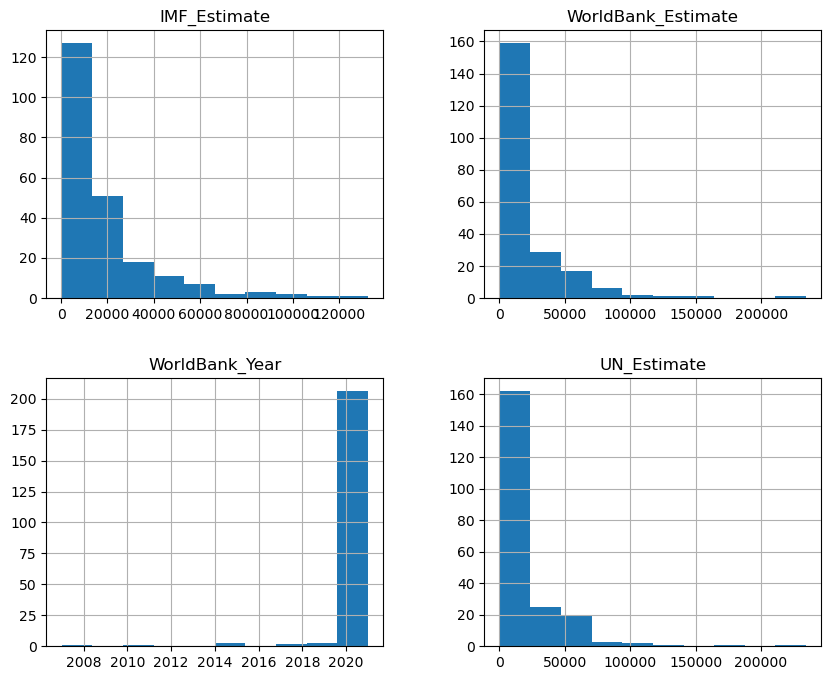

In [76]:
df.hist(figsize=(10,8))
plt.show()

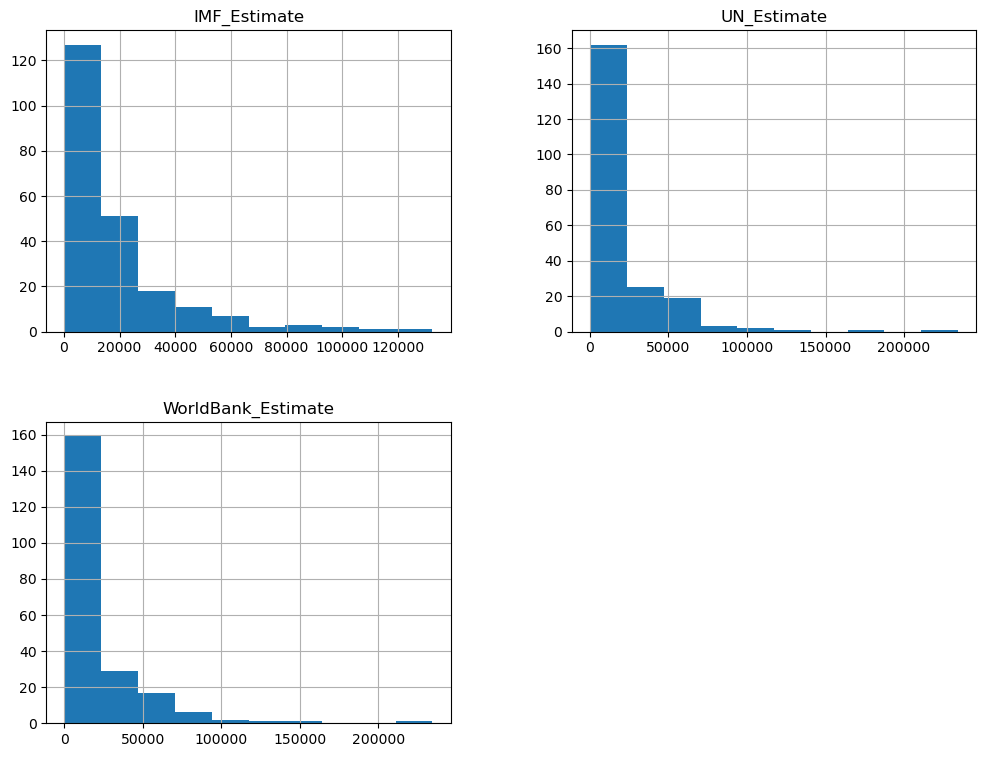

In [77]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(figsize=(12,9))

plt.show()

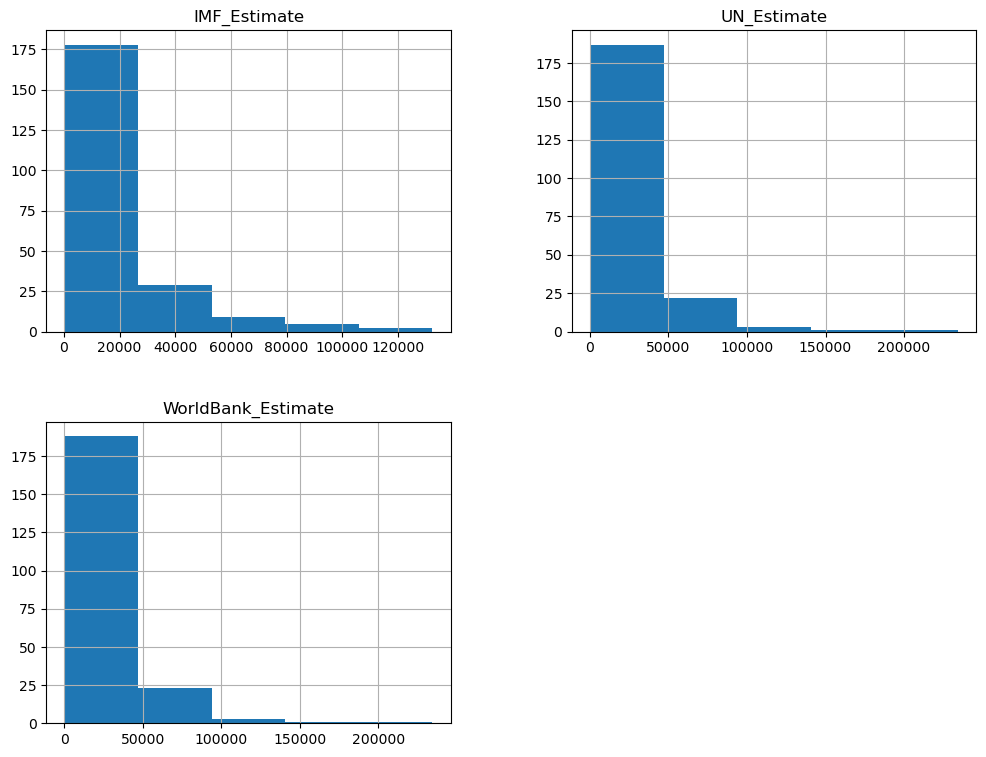

In [78]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=5, figsize=(12,9))

plt.show()

In [79]:
df["WorldBank_Estimate"].agg(["min","max"])

min       222.0
max    234316.0
Name: WorldBank_Estimate, dtype: float64

In [ ]:
234316/5
#1 bin size if bins=5

In [80]:
df[df["WorldBank_Estimate"]<=46863.2]["WorldBank_Estimate"].count()

188

In [ ]:
234316/10
#1 bin size if bins not given any number

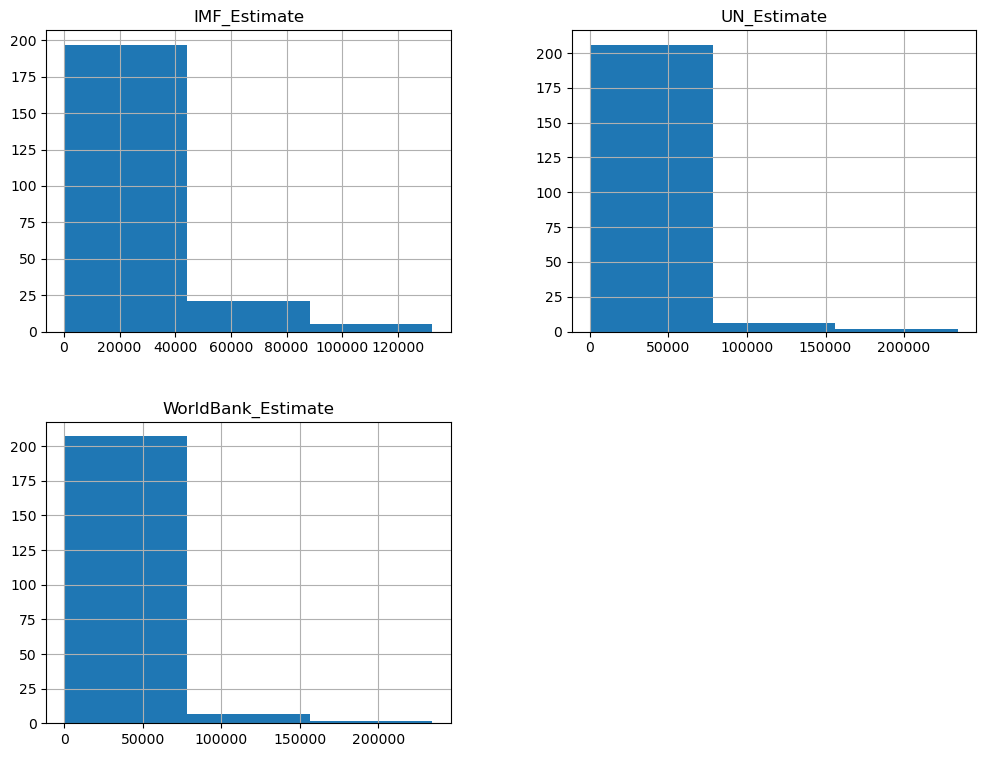

In [81]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=3, figsize=(12,9))

plt.show()

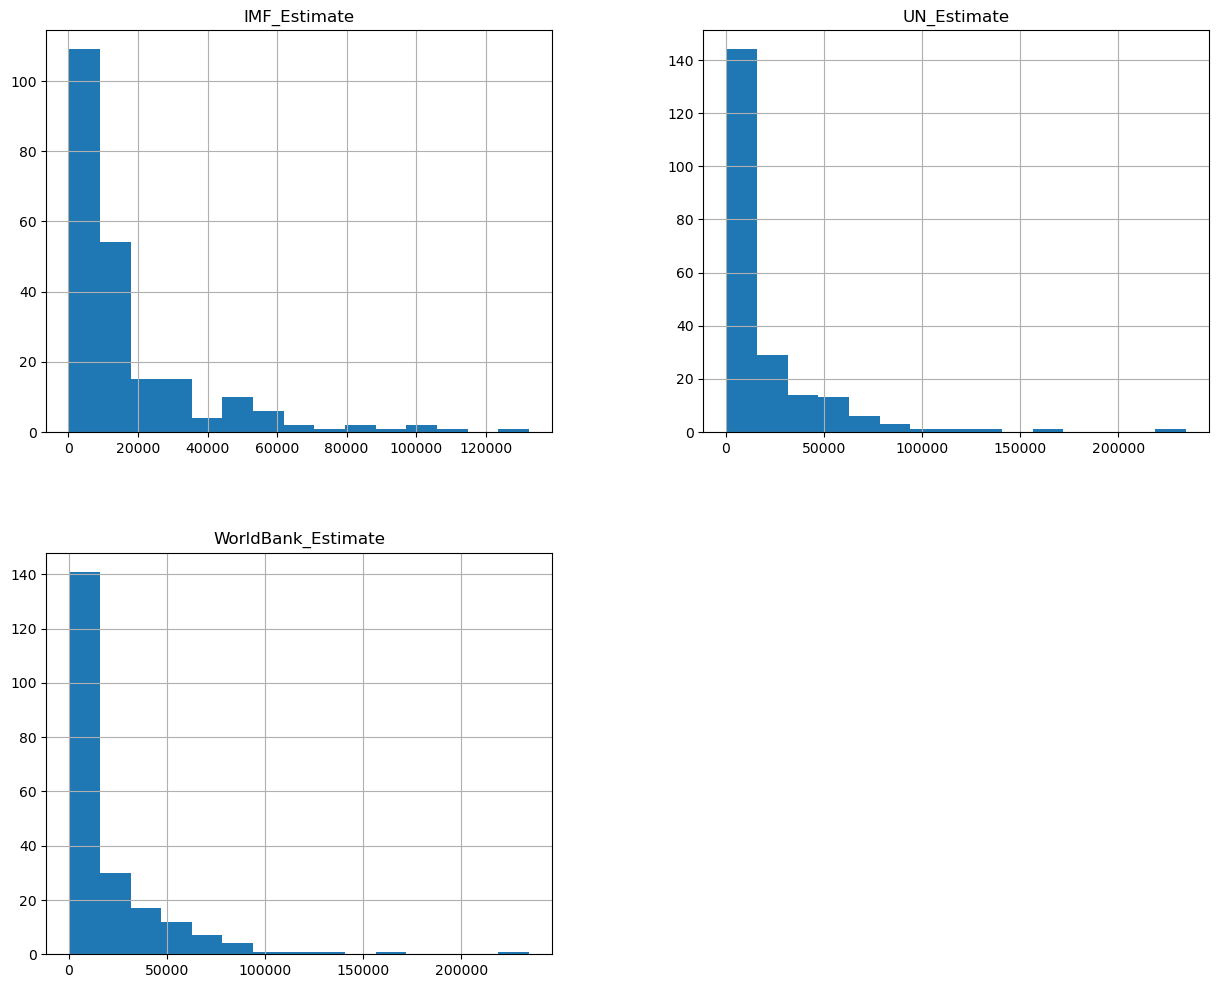

In [82]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].hist(bins=15, figsize=(15,12))

#23400/15 = 15300
plt.show()

### Correlation Heatmap

In [ ]:
df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

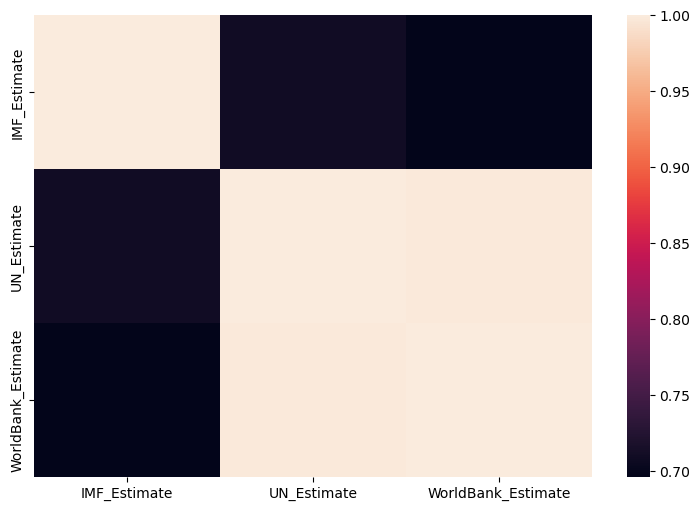

In [83]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))
sns.heatmap(corr)

plt.show()

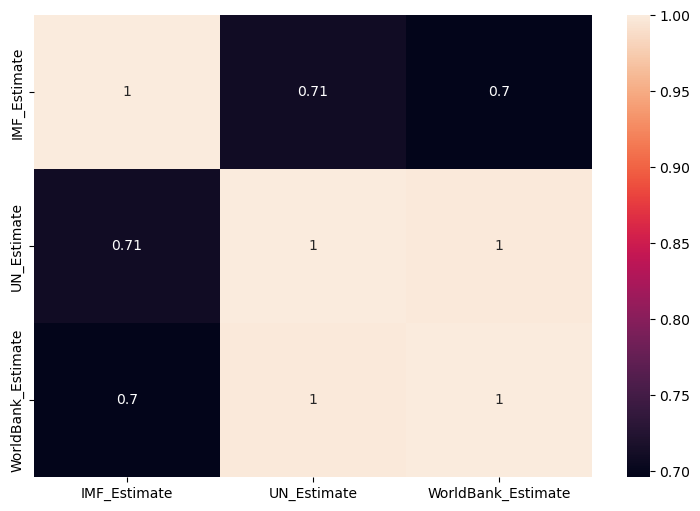

In [84]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True)

plt.show()

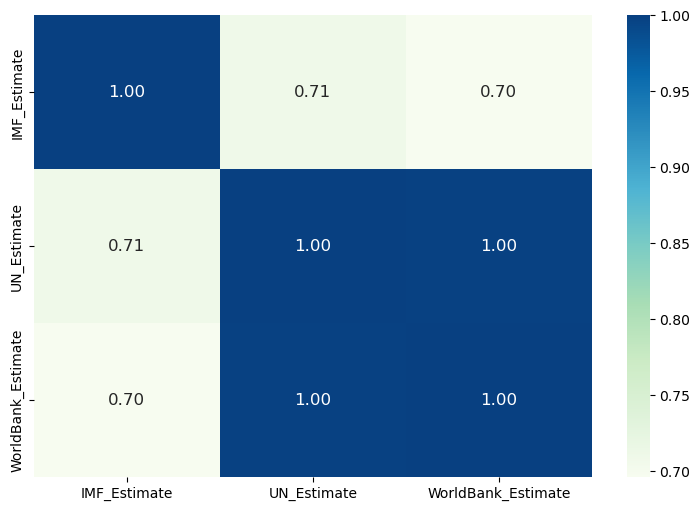

In [85]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, fmt=".2f", cmap = 'GnBu', annot_kws={"size": 12})

plt.show()

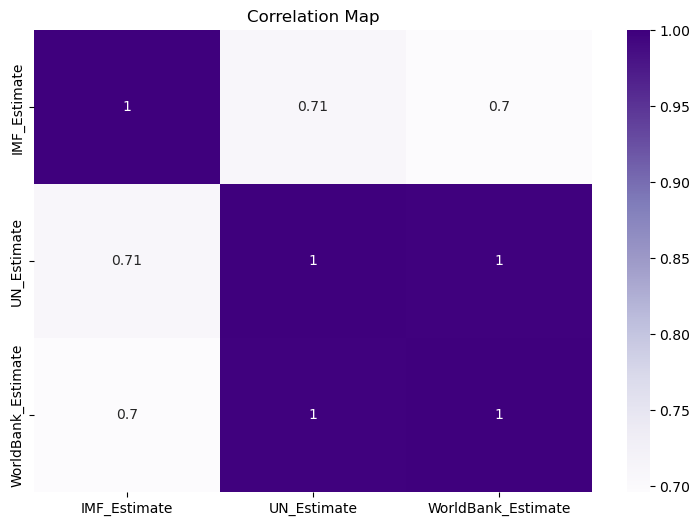

In [86]:
corr = df[["IMF_Estimate", "UN_Estimate", "WorldBank_Estimate"]].corr()

plt.figure(figsize=(9,6))

sns.heatmap(corr, annot=True, cmap = 'Purples')

plt.title("Correlation Map")


plt.show()

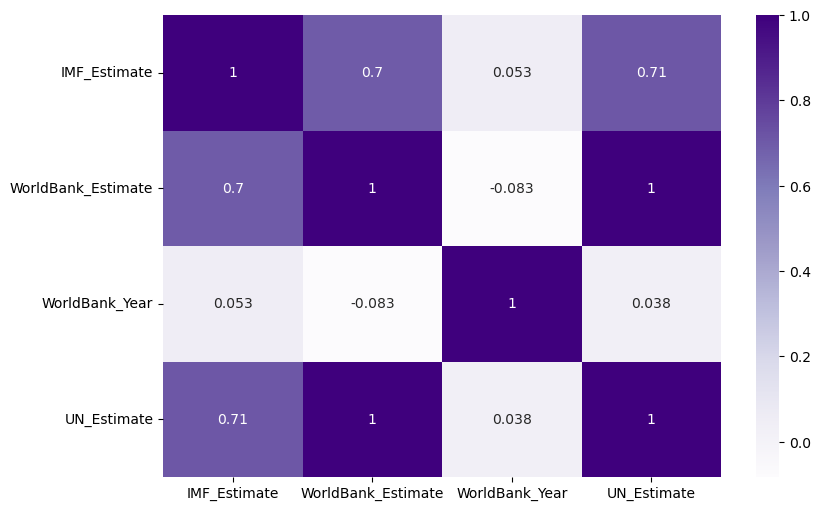

In [87]:
corr = df.select_dtypes(include=[int, float]).corr()
 
plt.figure(figsize=(9,6))
 
sns.heatmap(corr, annot=True, cmap = 'Purples')
 
plt.show()

### Bar plot

In [88]:
df.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,17377.736041,2022,234316.0,2021.0,234317.0,2021,2021
2,Liechtenstein,Europe,17377.736041,2022,157755.0,2020.0,169260.0,2021,2021
3,Luxembourg,Europe,132372.000000,2023,133590.0,2021.0,133745.0,2021,2021
4,Ireland,Europe,114581.000000,2023,100172.0,2021.0,101109.0,2021,2021
5,Bermuda,Americas,17377.736041,2022,114090.0,2021.0,112653.0,2021,2021


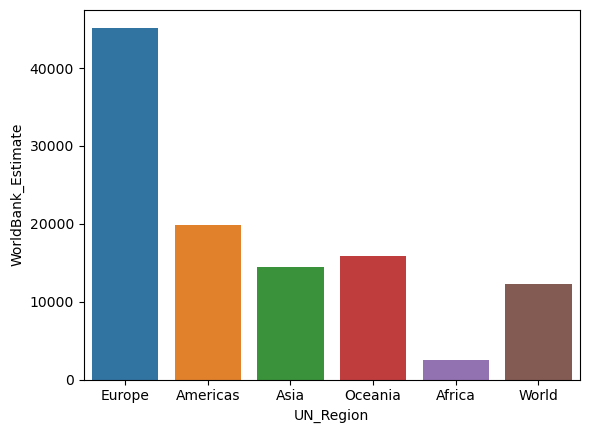

In [89]:
sns.barplot(x="UN_Region", y="WorldBank_Estimate", data=df, errorbar=None)

plt.show()

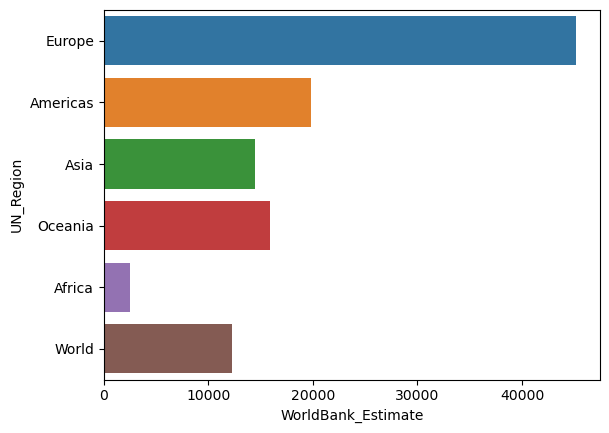

In [90]:
sns.barplot(x="WorldBank_Estimate", y="UN_Region", data=df, errorbar=None)

plt.show()

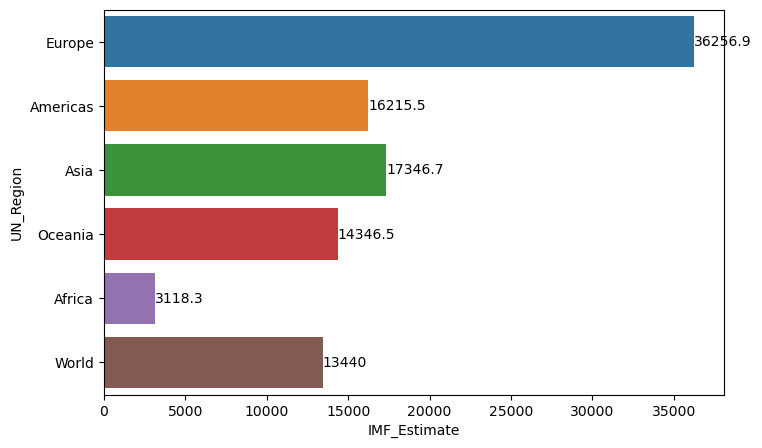

In [91]:
fig = plt.figure(figsize = (8,5))

ax = sns.barplot(x = "IMF_Estimate",  y = "UN_Region",  
data = df, errorbar = None)

ax.bar_label(ax.containers[0])

plt.show()

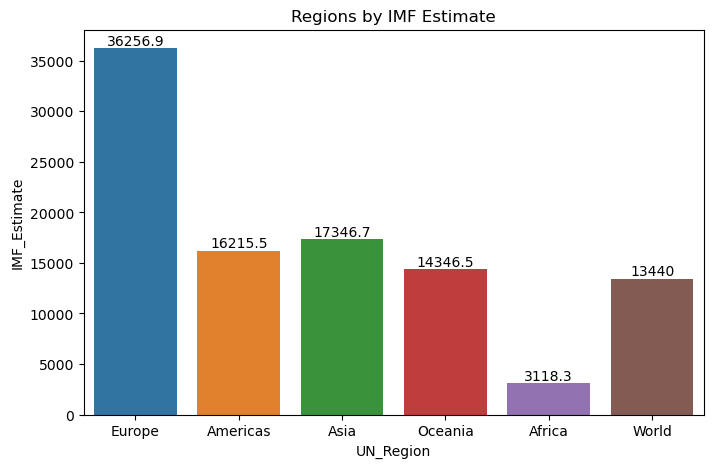

In [92]:
fig = plt.figure(figsize = (8,5)) 
ax = sns.barplot(x = "UN_Region",  y = "IMF_Estimate", 
                 data = df, errorbar = None) 

ax.bar_label(ax.containers[0]) 


ax.set_title("Regions by IMF Estimate")
plt.show()

### Scatter Plot

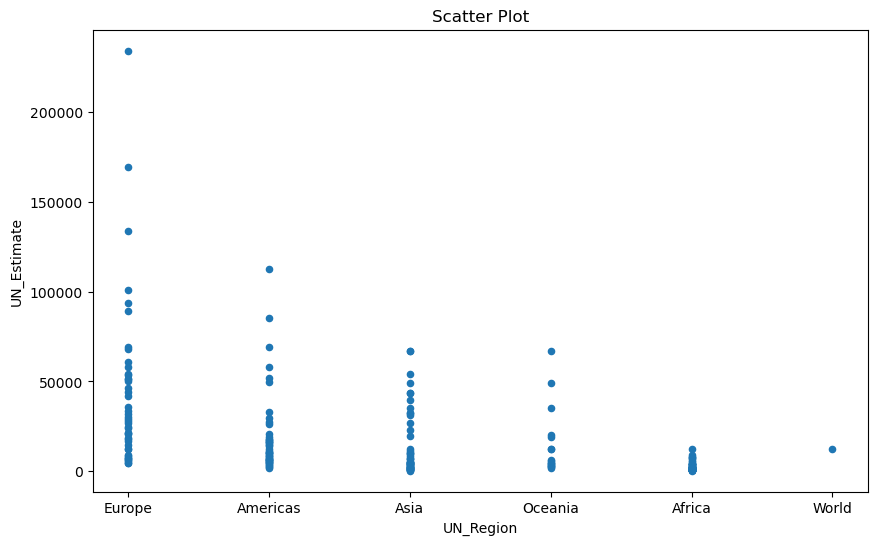

In [93]:
df.plot(x='UN_Region', y='UN_Estimate', kind='scatter',
        figsize=(10,6),
        title="Scatter Plot")

plt.show()

### Boxplot and Outliers

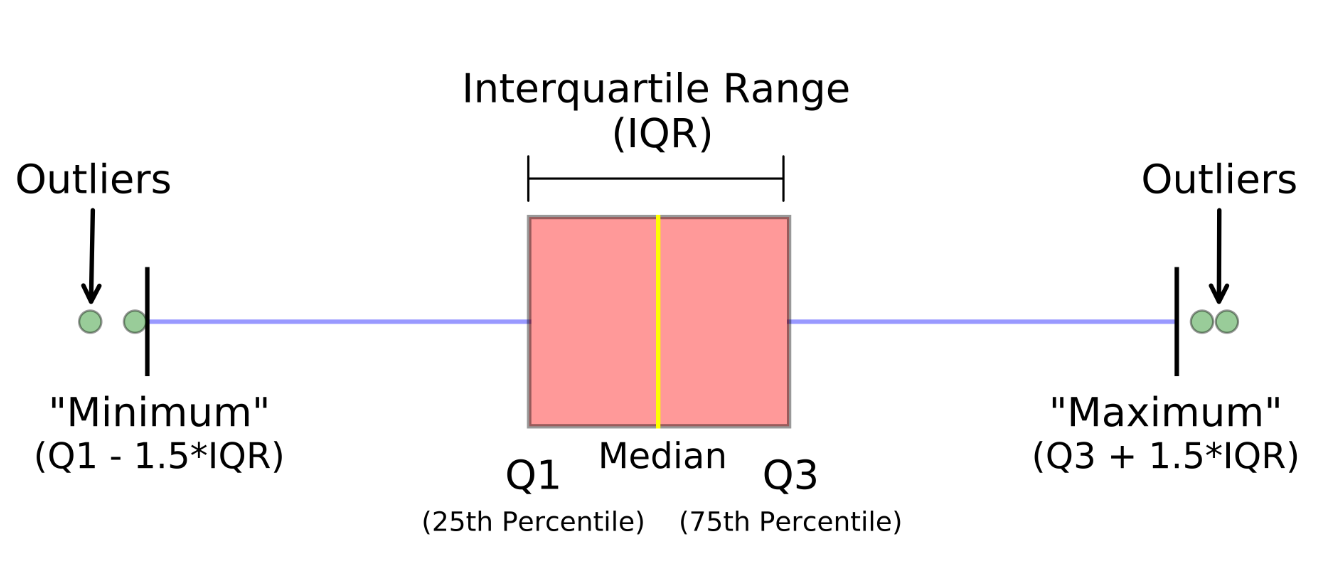

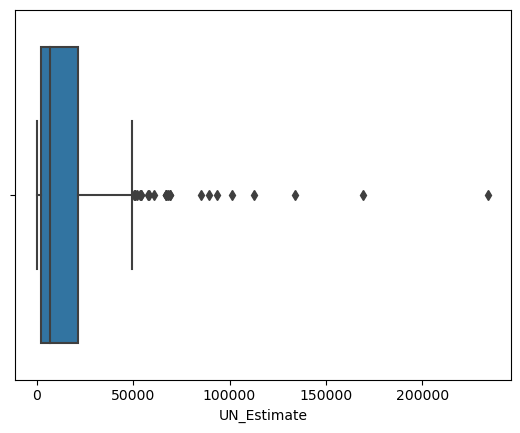

In [94]:
sns.boxplot(x=df["UN_Estimate"])

plt.show()

In [95]:
df[df["UN_Estimate"]>50000].head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,17377.736041,2022,234316.0,2021.0,234317.0,2021,2021
2,Liechtenstein,Europe,17377.736041,2022,157755.0,2020.0,169260.0,2021,2021
3,Luxembourg,Europe,132372.000000,2023,133590.0,2021.0,133745.0,2021,2021
4,Ireland,Europe,114581.000000,2023,100172.0,2021.0,101109.0,2021,2021
5,Bermuda,Americas,17377.736041,2022,114090.0,2021.0,112653.0,2021,2021


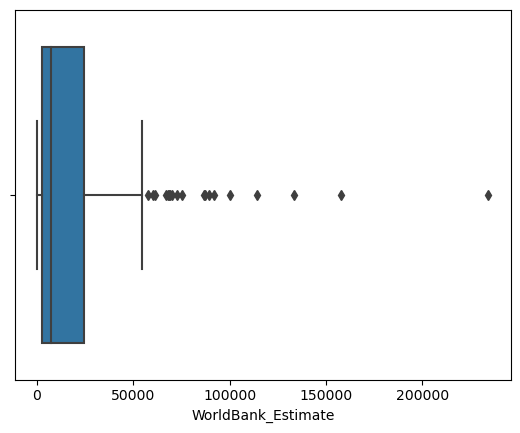

In [96]:
sns.boxplot(x=df["WorldBank_Estimate"])

plt.show()

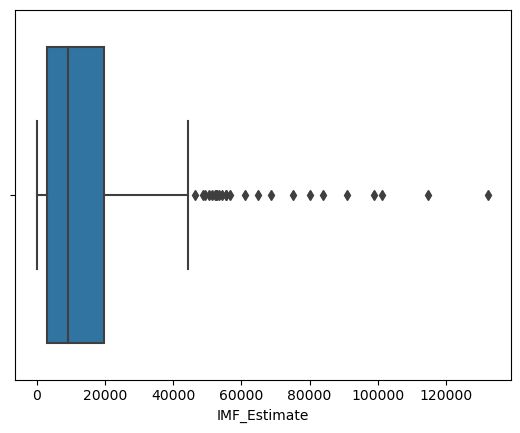

In [97]:
sns.boxplot(x=df["IMF_Estimate"])

plt.show()

In [98]:
df[df["UN_Estimate"]>100000]

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
1,Monaco,Europe,17377.736041,2022,234316.0,2021.0,234317.0,2021,2021
2,Liechtenstein,Europe,17377.736041,2022,157755.0,2020.0,169260.0,2021,2021
3,Luxembourg,Europe,132372.000000,2023,133590.0,2021.0,133745.0,2021,2021
4,Ireland,Europe,114581.000000,2023,100172.0,2021.0,101109.0,2021,2021
5,Bermuda,Americas,17377.736041,2022,114090.0,2021.0,112653.0,2021,2021


In [99]:
df.UN_Estimate.mean()

18514.528037383177

In [100]:
df.shape

(223, 9)

## Create another dataframe called data excluding  5 countries with highest UN estimate

In [101]:
data = df[-(df["UN_Estimate"]>100000)]

In [102]:
data.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
6,Norway,Europe,101103.000000,2023,89154.0,2021.0,89242.0,2021,2021
7,Switzerland,Europe,98767.000000,2023,91992.0,2021.0,93525.0,2021,2021
8,Singapore,Asia,91100.000000,2023,72794.0,2021.0,66822.0,2021,2021
9,Isle of Man,Europe,17377.736041,2022,87158.0,2019.0,NaN,0,0
10,Cayman Islands,Americas,17377.736041,2022,86569.0,2021.0,85250.0,2021,2021


In [103]:
data.shape

(218, 9)

In [104]:
data.UN_Estimate.mean()

15363.755980861244

In [105]:
df.UN_Estimate.mean()

18514.528037383177

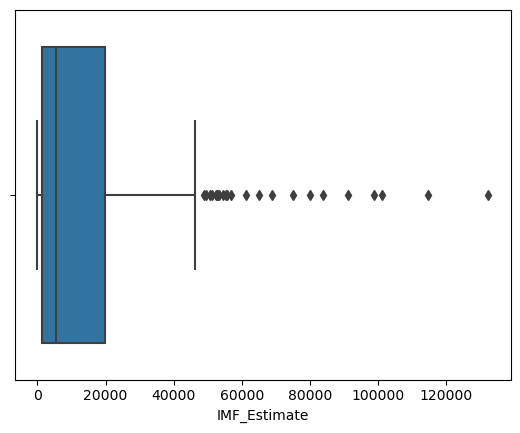

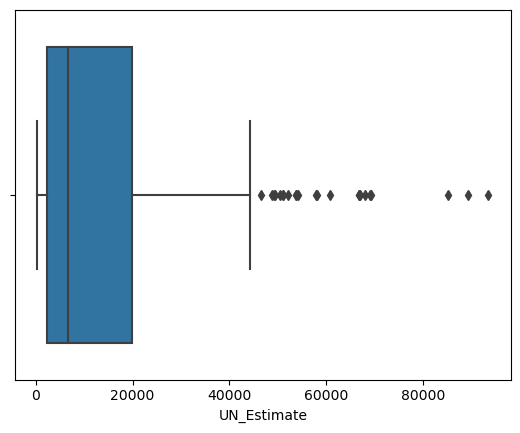

In [106]:
sns.boxplot(x=data["UN_Estimate"])
plt.show()

## Removing outliers

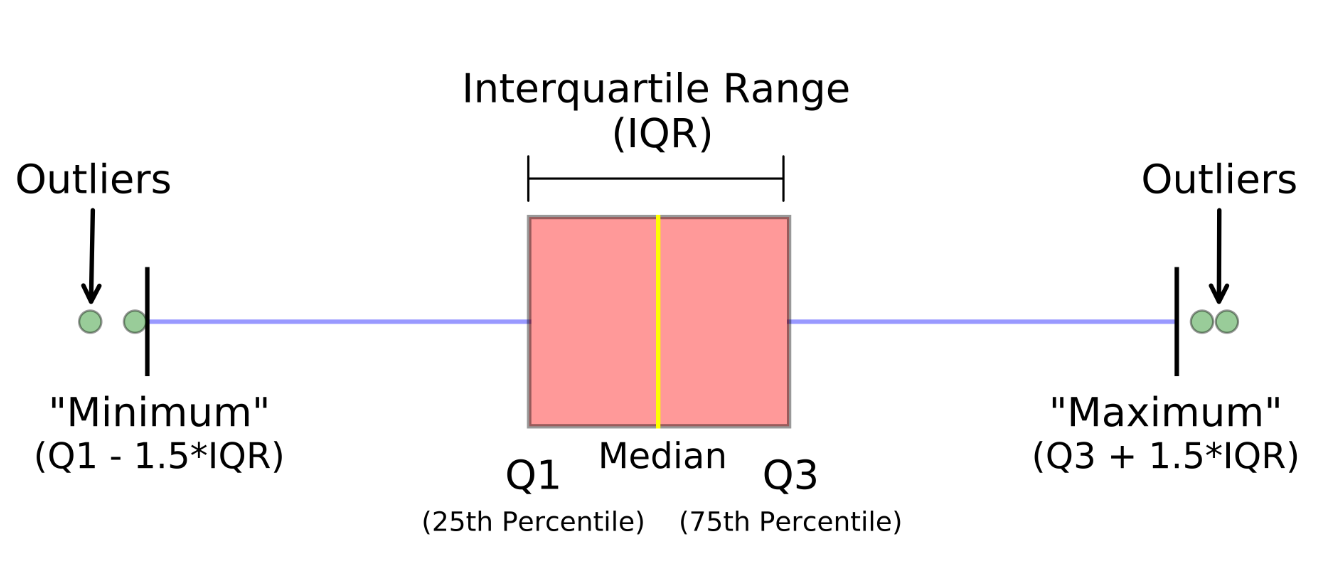

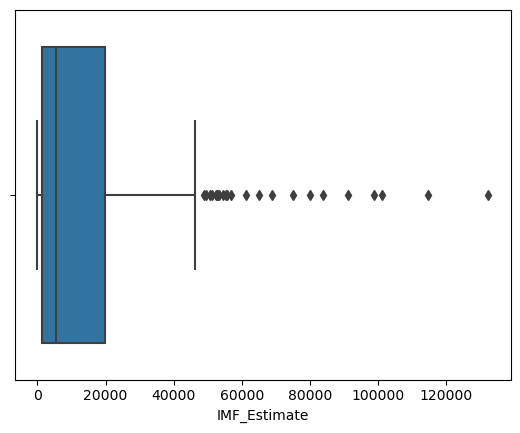

In [107]:
lower_q = df["UN_Estimate"].quantile(0.25)
lower_q

2331.75

In [108]:
higher_q = df["UN_Estimate"].quantile(0.75)
higher_q

21359.25

In [109]:
iqr = higher_q - lower_q
iqr

19027.5

In [110]:
upper_boundary = higher_q + 1.5 * iqr
upper_boundary

49900.5

In [111]:
lower_boundary = lower_q - 1.5 * iqr
lower_boundary

-26209.5

In [112]:
df_filtered = df[(df["UN_Estimate"] < upper_boundary) & (df["UN_Estimate"] > lower_boundary)]

In [113]:
df_filtered.head()

,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year,UN_Year_Clean
27,Hong Kong,Asia,52429.000000,2023,49801.0,2021.0,49259.0,2021,2021
29,Macau,Asia,50571.000000,2023,43874.0,2021.0,43555.0,2021,2021
30,United Arab Emirates,Asia,49451.000000,2023,44316.0,2021.0,43295.0,2021,2021
31,British Virgin Islands,Americas,17377.736041,2022,NaN,NaN,49444.0,2021,2021
32,New Zealand,Oceania,48826.000000,2023,48781.0,2021.0,48824.0,2021,2021


In [114]:
df_filtered.shape
# there were 223 rows - 196 = 27 outliers dropped

(190, 9)

In [115]:
df_filtered.UN_Estimate.mean()

10488.947368421053

In [116]:
df.UN_Estimate.mean()

18514.528037383177

In [117]:
#how can we create a table with following 
df_filtered.WorldBank_Estimate.mean()

10355.304347826086

In [118]:
df.WorldBank_Estimate.mean()

19540.805555555555

In [119]:
df_filtered.IMF_Estimate.mean()

11636.771413304836

In [120]:
df.IMF_Estimate.mean()

17377.736040609136